In [2]:
# 引包
from sklearn import datasets, cross_validation, naive_bayes
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 数据加载方法：
def load_data():
    digits=datasets.load_digits()
    return cross_validation.train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

In [4]:
# 多项式贝叶斯 条件概率满足多项式分布 加入拉普拉斯平滑
def test_MultinomialNB(*data):
    train_x,test_x, train_y, test_y = data
    cls = naive_bayes.MultinomialNB()
    cls.fit(train_x,train_y)
    print('Training Score: {0}'.format(cls.score(train_x,train_y)))
    print('Testing Score: {0}'.format(cls.score(test_x,test_y)))

In [5]:
# 查看多项式贝叶斯训练结果：
train_x,test_x, train_y, test_y = load_data()
test_MultinomialNB(train_x, test_x, train_y, test_y)

Training Score: 0.9064587973273942
Testing Score: 0.9088888888888889


In [6]:
# 查看不同的拉普拉斯平滑 对结果的影响：
def test_MultinomialNB_alpha(*data):
    train_x,test_x, train_y, test_y = data
    alphas = np.logspace(-2, 5 ,num=200)
    train_score = []
    test_score = []
    for alpha in alphas:
        cls = naive_bayes.MultinomialNB(alpha=alpha)
        cls.fit(train_x,train_y)
        train_score.append(cls.score(train_x,train_y))
        test_score.append(cls.score(test_x,test_y))
            
    # 绘图：
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(alphas,train_score,label='Training Score')
    ax.plot(alphas,test_score, label='Testing Score')
    ax.set_xlabel(r'$\alpha$')
    ax.set_ylabel('score')
    ax.set_ylim(0,1.0)
    ax.set_title('MultinomialNB')
    ax.set_xscale('log')
    plt.show()

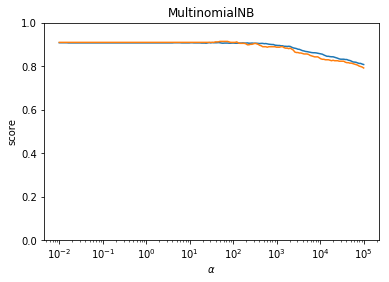

In [7]:
# 查看多项式贝叶斯训练结果：
train_x,test_x, train_y, test_y = load_data()
test_MultinomialNB_alpha(train_x, test_x, train_y, test_y)